In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("./main.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Volume,Stock
0,2000-06-26,0.3449,0.3658,0.2927,0.2968,23925000.0,AHEALTH
1,2000-06-27,0.2979,0.3909,0.2979,0.3575,42328100.0,AHEALTH
2,2000-06-28,0.3616,0.4285,0.3491,0.4223,33131200.0,AHEALTH
3,2000-06-29,0.4243,0.4724,0.4118,0.4118,31350000.0,AHEALTH
4,2000-06-30,0.3993,0.4369,0.3909,0.3930,10734400.0,AHEALTH


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93275 entries, 0 to 93274
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    93275 non-null  datetime64[ns]
 1   Open    93275 non-null  float64       
 2   High    93275 non-null  float64       
 3   Low     93275 non-null  float64       
 4   Close   93275 non-null  float64       
 5   Volume  93275 non-null  float64       
 6   Stock   93275 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.0+ MB


In [21]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df, minimal=True)

In [22]:
report.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


In [23]:
report.to_file("report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.01it/s]


In [24]:
df['Stock'].value_counts(normalize=True)

BSTEAD      0.097507
UTDPLT      0.084578
SURIA       0.066738
MKH         0.065784
SAM         0.061163
EUPE        0.057121
TONGHER     0.056746
APM         0.055235
PADINI      0.054248
AHEALTH     0.047976
CAPITALA    0.046025
ICAP        0.041533
WELLCAT     0.040322
PARKSON     0.038510
LUXCHEM     0.035465
OCNCASH     0.034672
KGB         0.028625
OCK         0.025870
KRONO       0.019577
BIOHLDG     0.018719
SALUTE      0.015813
HPMT        0.007773
Name: Stock, dtype: float64

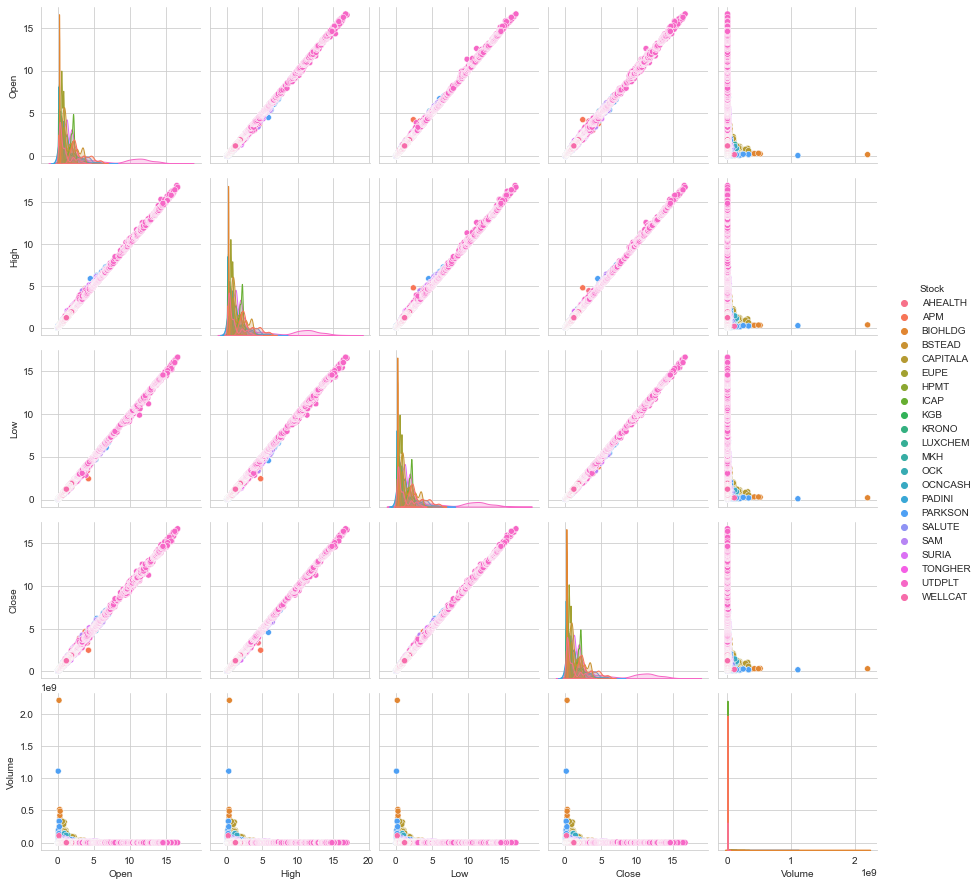

In [8]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Stock")
plt.show()

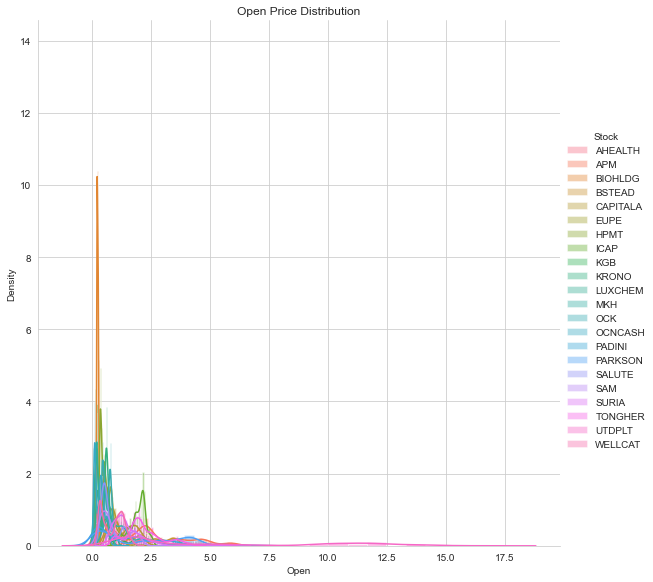

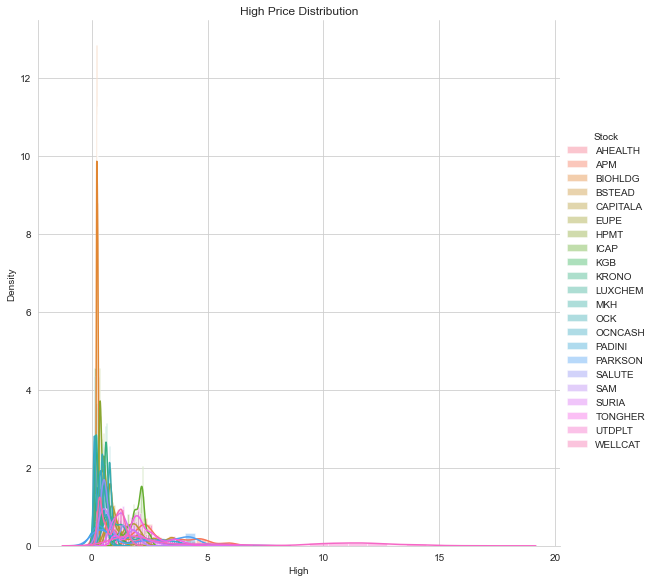

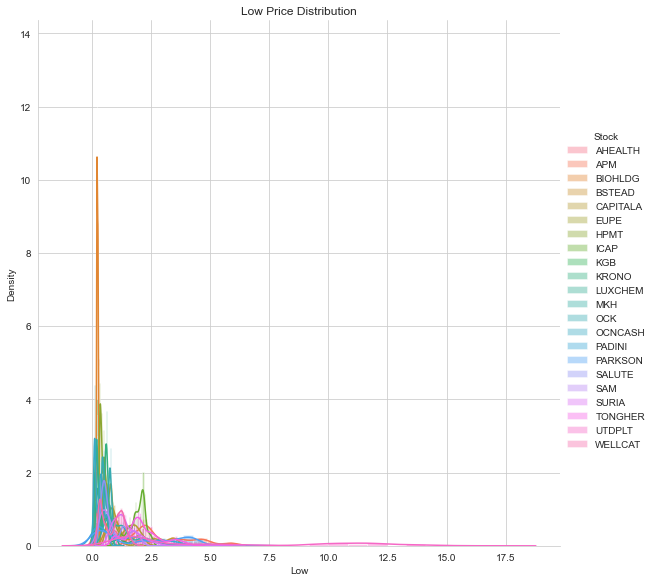

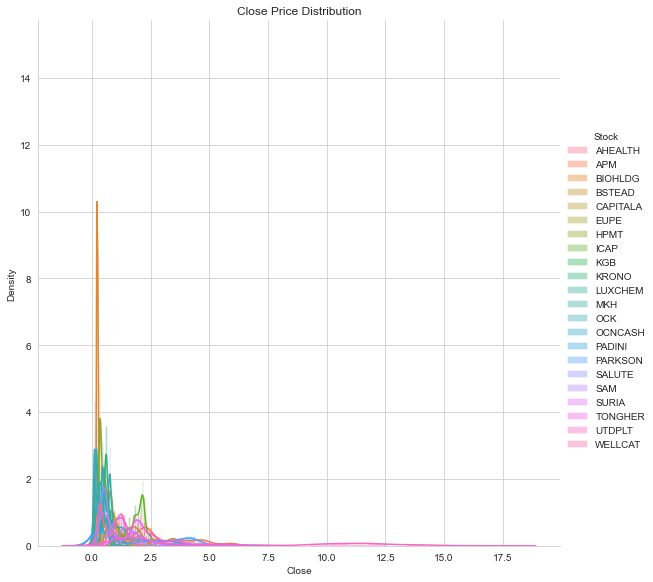

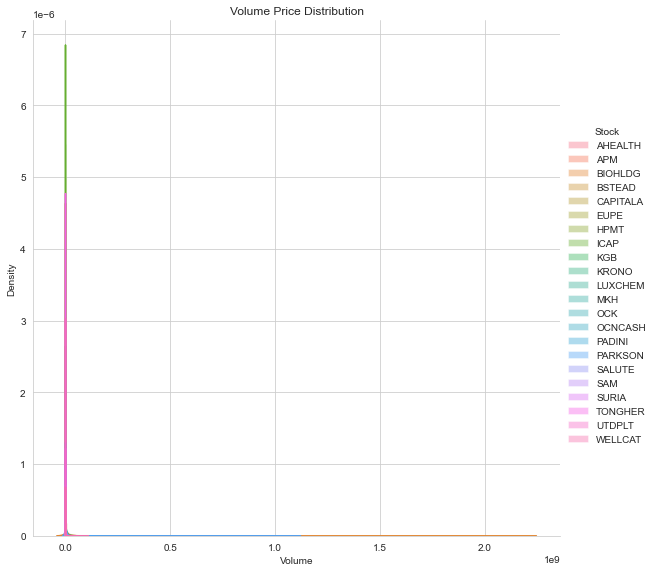

In [15]:
col = ['Open', 'High', 'Low', 'Close', 'Volume']
for c in col:
    sns.FacetGrid(df, hue='Stock', size=8).map(
        sns.distplot, c).add_legend()
    plt.title(f"{c} Price Distribution")
    plt.show()


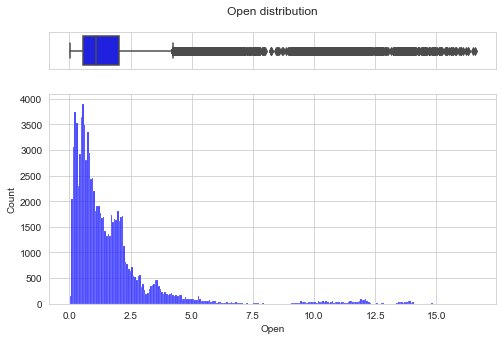

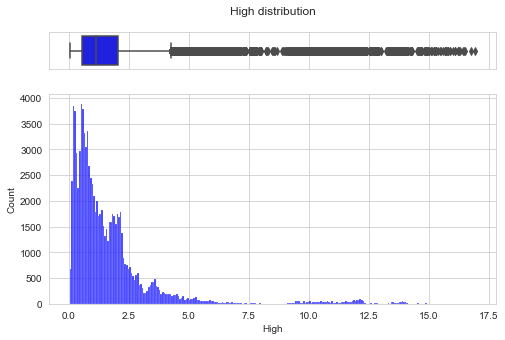

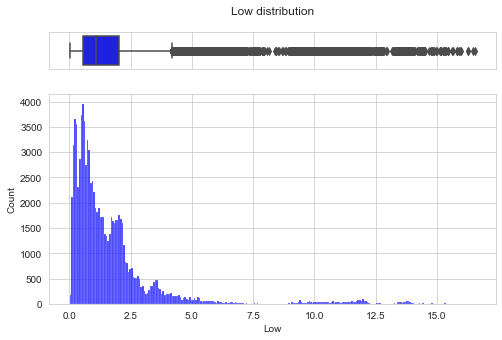

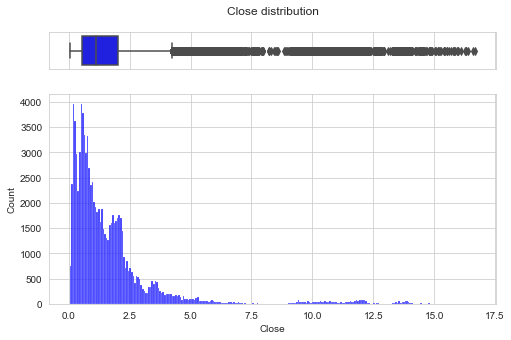

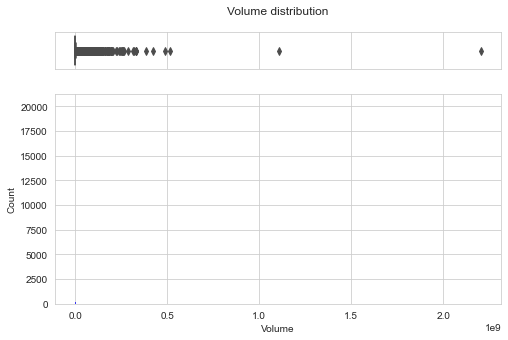

In [16]:
for c in col:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                          gridspec_kw={"height_ratios": (.15, .85)}, figsize=(8, 5))
    sns.boxplot(x=df[c], ax=ax_box, color='b')
    sns.histplot(data=df, x=c, color='b')
    ax_box.set(xlabel='')
    ax_box.set_title(f"{c} distribution\n")
    plt.show()

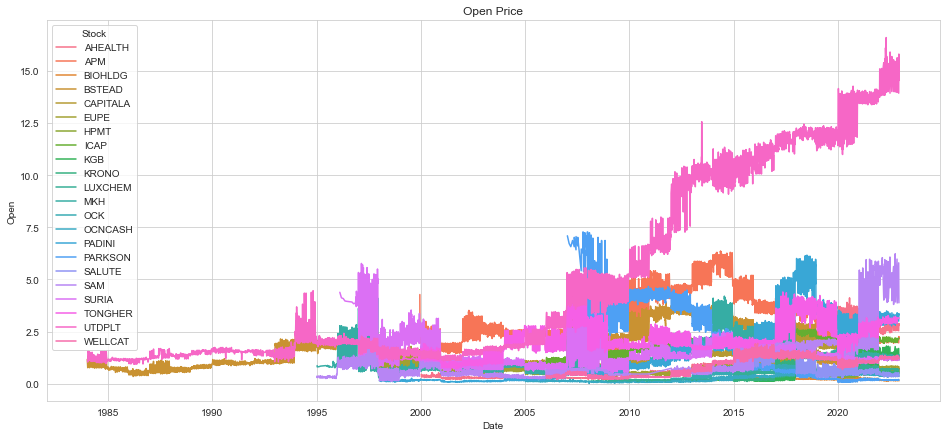

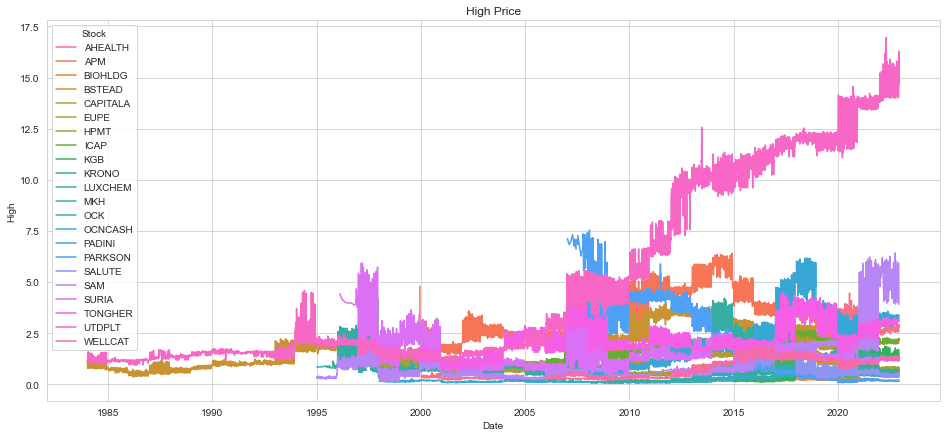

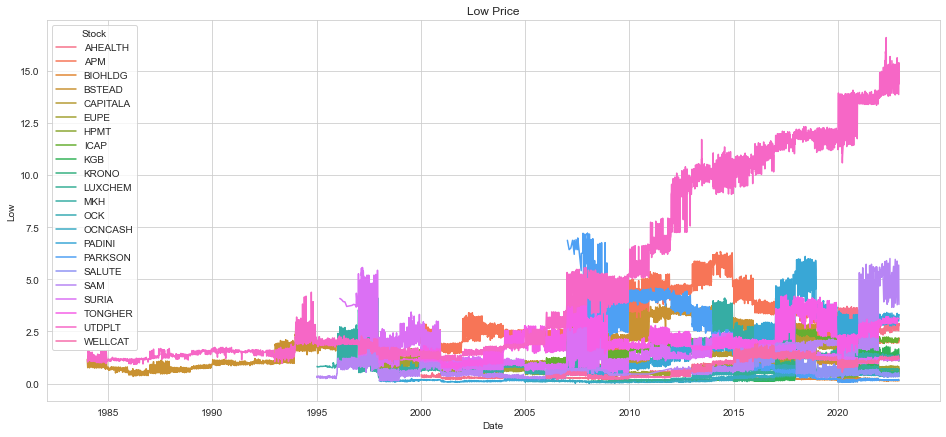

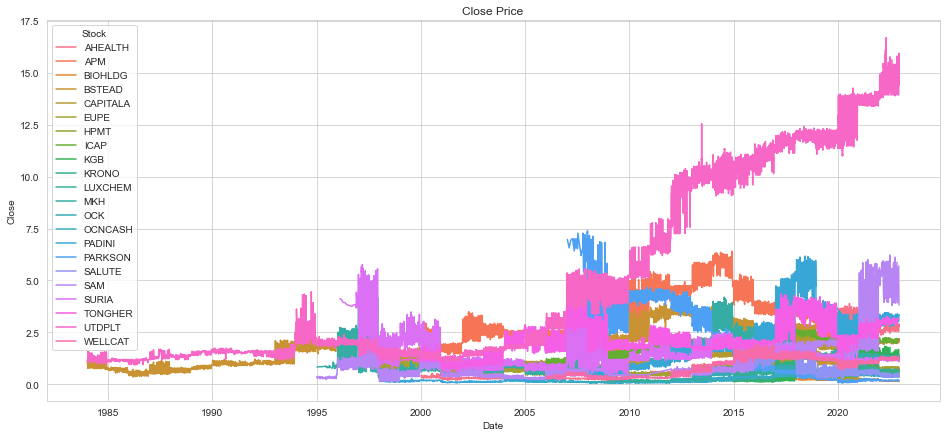

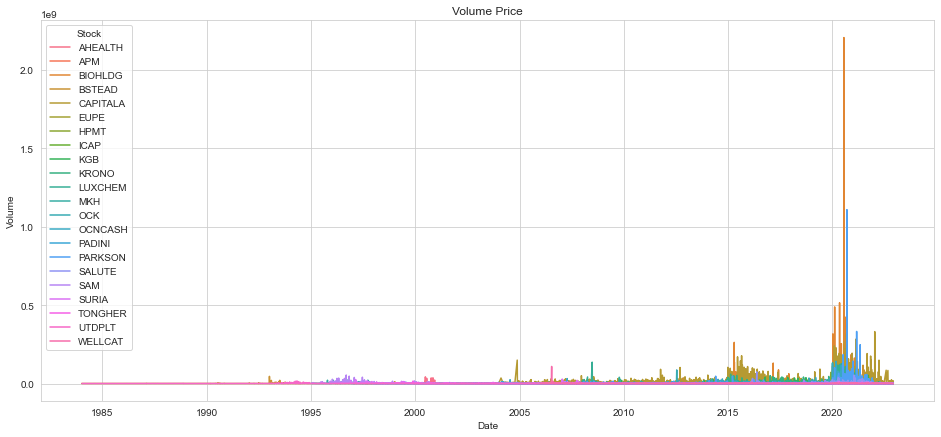

In [20]:
for c in col:
    plt.figure(figsize=(16, 7))
    sns.lineplot(x='Date', y=c, data=df, hue="Stock")
    plt.title(f"{c} Price")
    plt.show()